In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [2]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
## 加载鸢尾花数据
iris = datasets.load_iris()
## 获取前两列作为特征属性(可以比较一下后两列的效果)
X = iris.data[:, :2]
Y = iris.target


In [4]:
## 自定义一个核函数, 参数x，y是特征属性矩阵（会进行迭代，迭代后类型就会不同）
def my_kernel(x, y):
    """
    We create a custom kernel:

                 (2  0)
    k(x, y) = x  (    ) y.T
                 (0  1)
    """
    M = np.array([[2, 0], [0, 1]])
    return np.dot(np.dot(x, M), y.T)

训练集准确率:82.67%


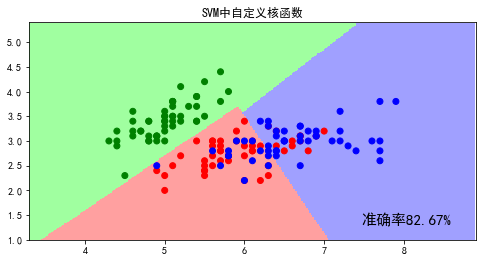

In [5]:
## 使用自定义的核函数创建一个SVM对象
clf = svm.SVC(kernel=my_kernel)
clf.fit(X, Y)

## 评估效果
score = clf.score(X,Y)
print ("训练集准确率:%.2f%%" % (score * 100))

## 构建预测网格
h = .02 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
## 预测值
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.figure(facecolor='w', figsize=(8,4))

## 画出区域图
plt.pcolormesh(xx, yy, Z, cmap=cm_light)

## 画出点图
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cm_dark)

## 设置title及其他相关属性
plt.title(u'SVM中自定义核函数')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.text(x_max - .3, y_min + .3, (u'准确率%.2f%%' % (score * 100)).lstrip('0'),  size=15, horizontalalignment='right')
plt.show()